# Decison Tree

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
from sklearn import datasets

#Reading the CSV file and storing it in the data frame object named df

df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data",names=['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','class'])

In [2]:
#Handling
del df['Fe']
del df['Ba']

In [3]:
df

,RI,Na,Mg,Al,Si,K,Ca,class
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,1
...,...,...,...,...,...,...,...,...
210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,7
211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,7
212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,7
213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,7


In [4]:
n= df.shape[0]  ## n denotes no. of rows or data instances
print(n)

214


## Decision Tree Classifier

Important Hyperparameters

1. criterion {“gini”, “entropy”}, default=”gini”
2. splitter {“best”, “random”}, default=”best”
3. max_depth int, default=None
4. random_stateint, RandomState instance or None, default=None

In [5]:
from sklearn import tree

Y = df['class']
X = df.drop('class',axis=1)

clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)  #Parameters
clf = clf.fit(X, Y)

In [6]:
clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

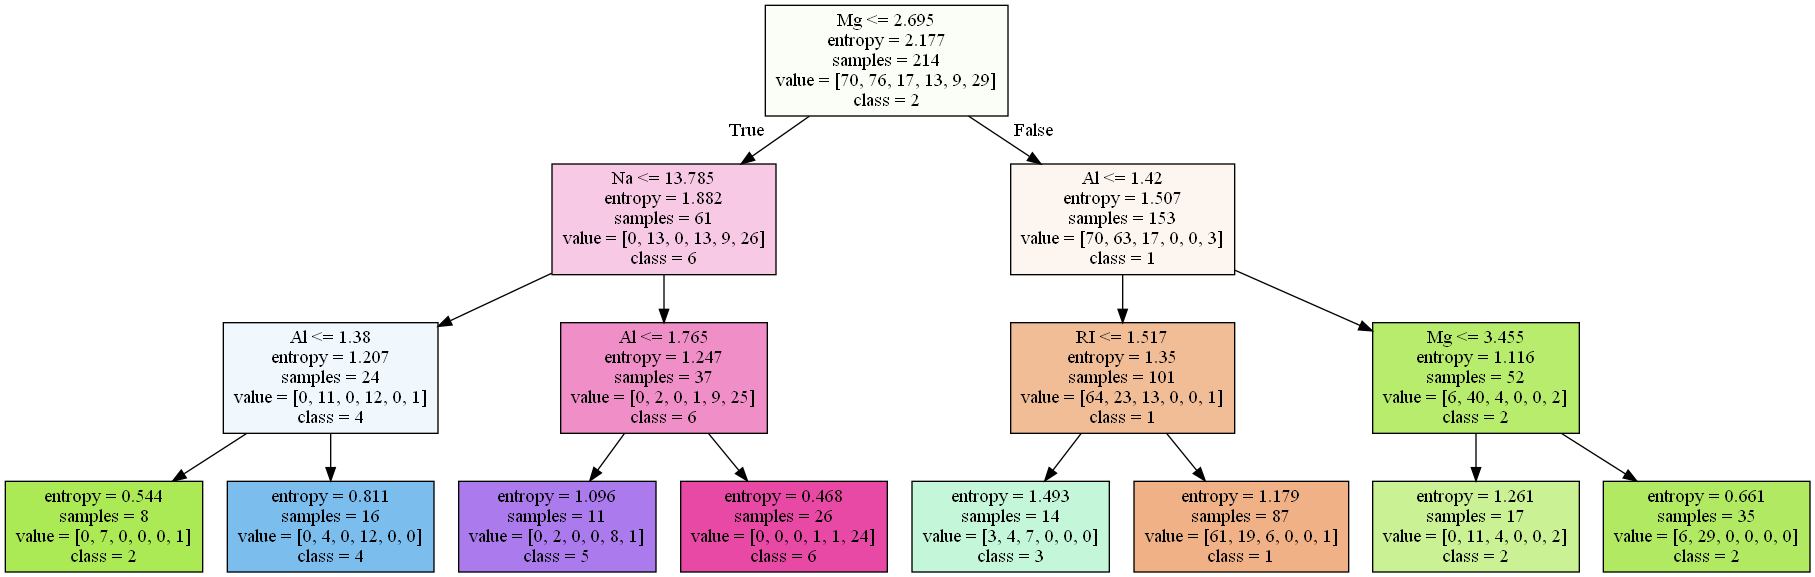

In [7]:
from graphviz import Digraph
import pydotplus
from IPython.display import Image

dot_data = tree.export_graphviz(clf, feature_names=X.columns, class_names=['1','2','3','4','5','6','7'], filled=True,out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
Image(graph.create_png())

In [8]:
# Training and Test set creation

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.8, random_state=1)

from sklearn import tree
from sklearn.metrics import accuracy_score


## Max_depth hyperparameter variation

In [9]:
# Model fitting and evaluation

maxdepths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]

trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(X_train, Y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    trainAcc[index] = accuracy_score(Y_train, Y_predTrain)
    testAcc[index] = accuracy_score(Y_test, Y_predTest)
    index += 1

Text(0, 0.5, 'Accuracy')

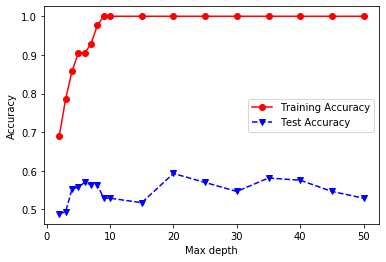

In [10]:
# Plot of training and test accuracies
    
plt.plot(maxdepths,trainAcc,'ro-',maxdepths,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')

## We consider max depth 5

## criterion {“gini”, “entropy”} variation

Text(0, 0.5, 'Accuracy')

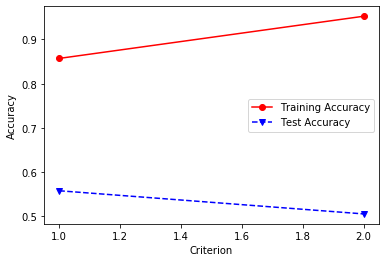

In [11]:
# Model fitting and evaluation

index = 0
criterion = ['gini','entropy']
maxtype=[1,2]

trainAcc = np.zeros(len(maxtype))
testAcc = np.zeros(len(maxtype))

for d in criterion :
    clf = tree.DecisionTreeClassifier(max_depth=4,criterion=d)
    clf = clf.fit(X_train, Y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    trainAcc[index] = accuracy_score(Y_train, Y_predTrain)
    testAcc[index] = accuracy_score(Y_test, Y_predTest)
    index += 1
    
# Plot of training and test accuracies
    
plt.plot([1,2],trainAcc,'ro-',maxtype,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Criterion')
plt.ylabel('Accuracy')

### Criterion Gini give better results

## Hyperparameter splitter variation

Text(0, 0.5, 'Accuracy')

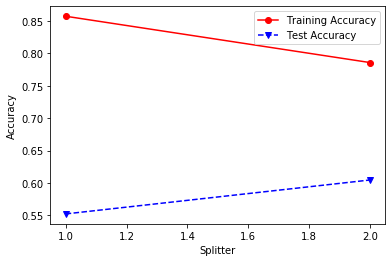

In [12]:
# Model fitting and evaluation

index = 0
splitter = ['best','random']
maxtype=[1,2]

trainAcc = np.zeros(len(maxtype))
testAcc = np.zeros(len(maxtype))

for d in splitter :
    clf = tree.DecisionTreeClassifier(max_depth=4,criterion='gini',splitter=d)
    clf = clf.fit(X_train, Y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    trainAcc[index] = accuracy_score(Y_train, Y_predTrain)
    testAcc[index] = accuracy_score(Y_test, Y_predTest)
    index += 1
    
# Plot of training and test accuracies
    
plt.plot([1,2],trainAcc,'ro-',maxtype,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Splitter')
plt.ylabel('Accuracy')

###  splitter random give slightly better accuracy

## Hyperparameter Random State variation

Text(0, 0.5, 'Accuracy')

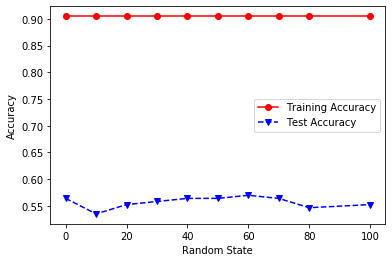

In [13]:
# Model fitting and evaluation

ram_state = [0,10,20,30,40,50,60,70,80,100]

trainAcc = np.zeros(len(ram_state))
testAcc = np.zeros(len(ram_state))

index = 0
for state in ram_state:
    clf = tree.DecisionTreeClassifier(max_depth=5,criterion='gini',random_state=state)
    clf = clf.fit(X_train, Y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    trainAcc[index] = accuracy_score(Y_train, Y_predTrain)
    testAcc[index] = accuracy_score(Y_test, Y_predTest)
    index += 1
    
    
# Plot of training and test accuracies
    
plt.plot(ram_state,trainAcc,'ro-',ram_state,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Random State')
plt.ylabel('Accuracy')

## Random State 60 give best test accuracy

In [14]:
X = df.values[:,:7] 
y = df.values[:,7] 

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 100)

dc = DecisionTreeClassifier(max_depth=5,criterion='gini',random_state=60)
dc.fit(X_train,y_train) 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=60, splitter='best')

In [15]:
y_pred = dc.predict(X_test) # getting predictions from the classifier
accuracy_score(y_test,y_pred) # calculating accuracy

0.6307692307692307

## Confusion Matrix

In [16]:
confusion_matrix(y_test,y_pred) 

array([[17,  0,  0,  0,  0,  0],
       [ 6, 17,  1,  0,  1,  0],
       [ 1,  1,  1,  0,  0,  0],
       [ 0,  6,  0,  0,  0,  3],
       [ 1,  1,  0,  0,  0,  1],
       [ 1,  1,  0,  0,  0,  6]], dtype=int64)

## classification report

In [17]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         1.0       0.65      1.00      0.79        17
         2.0       0.65      0.68      0.67        25
         3.0       0.50      0.33      0.40         3
         5.0       0.00      0.00      0.00         9
         6.0       0.00      0.00      0.00         3
         7.0       0.60      0.75      0.67         8

    accuracy                           0.63        65
   macro avg       0.40      0.46      0.42        65
weighted avg       0.52      0.63      0.56        65



C:\Users\VIBHU GOYAL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## k-fold cross validation

### Assume k=10

In [18]:
## Randomly Shuffle the data
df=df.sample(frac=1)

In [19]:

## making our folds

k = 10
folds = np.array_split(df, k)

## function to perform our accuracy testing

def perform(Train, test):
    # remove labels from data
    """
    train_labels = train_set.pop('class').values
    test_labels = test_set.pop('class').values
    clf.fit(train_set, train_labels)
    
    print("Accuracy Score is:",clf.score(test_set, test_labels))
    """
    
    X_train=Train.values[:,:7]
    X_test=Train.values[:,7]
    y_train=test.values[:,:7]
    y_test=test.values[:,7]
    
    dc = DecisionTreeClassifier(max_depth=5,criterion='gini',random_state=60)
    dc.fit(X_train,X_test)
    y_pred = dc.predict(y_train) # getting predictions from the classifier
    
    
    print("Accuracy score is :",accuracy_score(y_test,y_pred),'\n') # calculating accuracy
    print("Confusion Matrix is :\n\n",confusion_matrix(y_test,y_pred))
    print("\nClassification Report is as follows :\n")
    print(classification_report(y_test,y_pred))
    
    return accuracy_score(y_test,y_pred)

variance_arr=[0]*10

for i in range(k):
    train = folds.copy() ##you wanna work on a copy of your array
    test = folds[i]
    del train[i]
    train = pd.concat(train, sort=False)
    print("Test set is fold number :",i+1)
    variance_arr[i]= perform(train.copy(), test.copy()) ##do the fitting, here you also want to copy
    print("------------------------------------------------------------------------------------------")
    
import statistics
res=statistics.variance(variance_arr)
print("Variance of the test accuracy error is",res)
    
##In this function you remove the label column from your sets and fit the scikit-classifier (clf) and then return the prediction.



Test set is fold number : 1
Accuracy score is : 0.6363636363636364 

Confusion Matrix is :

 [[7 2 0 0 0 0]
 [3 4 1 0 0 0]
 [1 0 1 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 1 1]]

Classification Report is as follows :

              precision    recall  f1-score   support

         1.0       0.64      0.78      0.70         9
         2.0       0.67      0.50      0.57         8
         3.0       0.50      0.50      0.50         2
         5.0       1.00      1.00      1.00         1
         6.0       0.00      0.00      0.00         0
         7.0       1.00      0.50      0.67         2

    accuracy                           0.64        22
   macro avg       0.63      0.55      0.57        22
weighted avg       0.68      0.64      0.65        22

------------------------------------------------------------------------------------------
Test set is fold number : 2
Accuracy score is : 0.6818181818181818 

Confusion Matrix is :

 [[2 1 0 0 0 0]
 [4 6 0 0 0 0]
 [1 0 2 0 0 0]
 [0 

C:\Users\VIBHU GOYAL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\VIBHU GOYAL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\VIBHU GOYAL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\VIBHU GOYAL\anaconda3\lib\site-packages\skle

In [20]:
import statistics
res=statistics.variance(variance_arr)
print("Variance of the test accuracy error is",res)

Variance of the test accuracy error is 0.007369146005509643
